

## 04EPPY - Actividad 1

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 10/03/2022
- Convocatoria 2 - 17/03/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros. 

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que hacer un tag al repositorio en una fecha anterior a la fecha de entrega de la actividad, y pegar el enlace al tag del repositorio en la actividad de blackboard.

### A1 - Ficheros - 15%
- Descarga datos mediante la siguiente url https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv
- Imprimir el número de ciudades que tiene el estado de Florida
- Resolver el problema de dos maneras distintas, una usando pandas y otra sin usar ninguna librería (solo Python standard)

In [98]:
import pandas as pd
import urllib.request # para descargar de URL
import os

# descargamos los datos 
url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'  
path = os.path.join("data", "us_cities_states_counties.csv")
urllib.request.urlretrieve(url, path)

('data/us_cities_states_counties.csv',
 <http.client.HTTPMessage at 0x7fb2d038eb30>)

In [99]:
# leemos desde el path creado como dataframe de pandas
df_us_cities_states_counties = pd.read_csv(path, sep='|', index_col=0, engine='python')
display(df_us_cities_states_counties)

,State short,State full,County,City alias
City,,,,
Holtsville,NY,New York,SUFFOLK,Internal Revenue Service
Holtsville,NY,New York,SUFFOLK,Holtsville
Adjuntas,PR,Puerto Rico,ADJUNTAS,URB San Joaquin
Adjuntas,PR,Puerto Rico,ADJUNTAS,Jard De Adjuntas
Adjuntas,PR,Puerto Rico,ADJUNTAS,Colinas Del Gigante
...,...,...,...,...
Klawock,AK,Alaska,PRINCE OF WALES HYDER,Klawock
Metlakatla,AK,Alaska,PRINCE OF WALES HYDER,Metlakatla
Point Baker,AK,Alaska,PRINCE OF WALES HYDER,Point Baker


In [100]:
# creamos una máscara para filtrar el estado de Florida
mask_fl = df_us_cities_states_counties['State short'] == "FL"
df_florida = df_us_cities_states_counties.loc[mask_fl]
df_florida

,State short,State full,County,City alias
City,,,,
Fleming Island,FL,Florida,CLAY,Orange Pk
Fleming Island,FL,Florida,CLAY,Fleming Island
Fleming Island,FL,Florida,CLAY,Fleming Isle
Fleming Island,FL,Florida,CLAY,Orange Park
Ponte Vedra Beach,FL,Florida,SAINT JOHNS,Ponte Vedra Beach
...,...,...,...,...
Okeechobee,FL,Florida,OKEECHOBEE,Yeehaw
Palm City,FL,Florida,MARTIN,Palm City
Port Salerno,FL,Florida,MARTIN,Port Salerno


In [101]:
# para calcular el número de ciudades podemos obtener los valores únicos y contarlos
print(f'Número de ciudades en FL: {len(df_florida.index.value_counts())}')
print(f'Número de ciudades en FL: {len(pd.unique(df_florida.index))}')

Número de ciudades en FL: 537
Número de ciudades en FL: 537


In [102]:
# sin usar pandas podemos usar csv reader
import csv
florida_cities = []
with open (path, "r") as f:
    data_reader = csv.reader(f, delimiter='|')
    for row in data_reader:
        if row[1] == 'FL':
            if row[0] not in florida_cities:
                florida_cities.append(row[0])
print(f'Número de ciudades en FL:  {len(florida_cities)}')

Número de ciudades en FL:  537


### A2 - 15%
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 16x1)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [103]:
import numpy as np

np.random.seed(42)
M = np.random.randint(101,size=(16,16))
display(M)
display(M.shape)


array([[ 51,  92,  14,  71,  60,  20,  82,  86,  74,  74,  87,  99,  23,
          2,  21,  52],
       [  1,  87,  29,  37,   1,  63,  59,  20,  32,  75,  57,  21,  88,
         48,  90,  58],
       [ 41,  91,  59,  79,  14,  61,  61,  46,  61,  50,  54,  63,   2,
        100,  50,   6],
       [ 20,  72,  38,  17,   3,  88,  59,  13,   8,  89,  52,   1,  83,
         91,  59,  70],
       [ 43,   7,  46,  34,  77,  80,  35,  49,   3,   1,   5,  53,   3,
         53,  92,  62],
       [ 17,  89,  43,  33,  73,  61,  99,  13,  94,  47,  14,  71,  77,
         86,  61,  39],
       [ 84,  79,  81,  52,  23,  25,  88,  59,  40,  28,  14,  44,  64,
         88,  70,   8],
       [ 87,   0,   7,  87,  62,  10,  80,   7,  34,  34,  32,   4,  40,
         27,   6,  72],
       [ 71,  11,  33,  32,  47,  22,  61,  87,  36,  98,  43,  85,  90,
         34,  64,  98],
       [100,  46,  77,   2,   0,   4,  89,  13,  26,   8,  78,  14,  89,
         41,  76,  50],
       [ 62,  95,  51,  95,   

(16, 16)

In [104]:
#aplicamos la función sum de numpy en axis = 1 y sumamos cada fila
print(f' El array suma es :  {np.sum(M, axis=1)}')
print(f' El array medio es :  {np.mean(M,axis=1)}')
print(f' El array mediano es :  {np.median(M,axis=1)}')
print(f' El array mínimo es :  {np.min(M,axis=1)}')
print(f' El array máximo es :  {np.max(M,axis=1)}')

 El array suma es :  [908 766 838 763 643 917 847 589 912 713 811 819 827 787 830 875]
 El array medio es :  [56.75   47.875  52.375  47.6875 40.1875 57.3125 52.9375 36.8125 57.
 44.5625 50.6875 51.1875 51.6875 49.1875 51.875  54.6875]
 El array mediano es :  [65.5 52.5 56.5 55.5 44.5 61.  55.5 33.  54.  43.5 46.5 50.  61.  51.
 54.  61. ]
 El array mínimo es :  [ 2  1  2  1  1 13  8  0 11  0  3  5  0  1  0 10]
 El array máximo es :  [ 99  90 100  91  92  99  88  87  98 100 100  91  96 100 100  97]


### A3 - 10%
- Explica y expón, con un ejemplo propio, el broadcasting de NumPy

El _broadcasting_ en numpy es el modo de actuación que utiliza la librería a la hora de realizar operaciones entre arrays que tienen diferentes dimensiones, por la cual el array de inferior tamaño se distribuye en el array de mayor tamaño, de manera semejante a como entendemos la propiedad distributiba en aritmética. 
Cuando dos arrays de tamaño 
```python 
len(a) = len(b)
``` 
se multiplican, numpy multiplica cada elemento equivalente entre ambos:

$$a_1 * b_1 = c_1, ..., a_i * b_i = c_i $$

Por ejemplo, de la siguiente manera:


In [105]:
a = np.array([8, 9, 1, 1])
b = np.array([600, 0, 4, 2])
c = a * b
print(c)

[4800    0    4    2]


En cambio, cuando el caso en el que:
```python 
len(a) != len(b)
4 != 1
``` 
$$a_1 * b_1 = c_1,   ...  ,  a_i * b_1 = c_i $$

El segundo elemento se distribuye en el más grande de los dos, para ser compatible con el tamaño del otro, tal que:

In [106]:
a = np.array([8, 9, 1, 1])
b = np.array([600])
c = a * b
print(c)

[4800 5400  600  600]


De la misma manera, sería compatible con broadcasting si tuvieramos un array de n dimensiones, contra otro de 1 dimensión:

$$a_1i * b_1i = c_1i,   ...  ,  a_ji * b_1i = c_ji $$

In [107]:
a = np.array([[8, 9, 1, 1],[82, 19, 11, 10],[18, 29, 21, 17]])
b = np.array([18, 9, 21, 1])
c = a * b
print(c)

[[ 144   81   21    1]
 [1476  171  231   10]
 [ 324  261  441   17]]


Nótese que actúa a nivel de fila y no como una multiplicación entre matrices

### A4 - 10%
- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9y +  4x = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$

In [108]:
# A
equation_a = np.array([[-9,4],[-7,16]])
equals_a = np.array([20,80])
result = np.linalg.solve(equation_a,equals_a)
result

array([-0.,  5.])

In [109]:
# B

equation_b = np.array([[1,-2,3],[2,1,1],[-3,2,-2]])
equals_b = np.array([7,4,-10])
result = np.linalg.solve(equation_b,equals_b)
result

array([ 2., -1.,  1.])

### A5 - 15%
- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [110]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(21,size=(10,10)))


In [111]:
mask = df < 5
df = df.where(mask, np.nan )
df

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,2.0,NaN,NaN,3.0,NaN,NaN,3.0,1.0,NaN
6,NaN,3.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
9,NaN,NaN,NaN,2.0,2.0,0.0,4.0,NaN,NaN,NaN


In [112]:
df.isnull().sum(axis=1)

0    10
1     6
2     9
3     7
4     9
5     6
6     7
7    10
8     8
9     6
dtype: int64

### A6 - 20%
- Se tienen tres datasets, se adjuntan sus datos como diccionarios
  - Students, representa un conjunto de alumnos, con sus nombres, edad y sexo
  - Subjects, un conjunto de asignaturas, con su nombre y el semestre en que se imparten
  - Marks, un conjunto de notas que han obtenido los alumnos en las asignaturas
- Obtener la siguiente información usando Pandas
  - El nombre del alumno con la mejor nota, y en que asignatura ha sido
  - Cuantos alumnos tienen asignaturas suspendidas en el primer semestre
  - La media de edad de los asistentes a la asignatura de Python
  - Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad
- Representar graficamente
  - Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
  - La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

In [113]:
students = {'StudentId': [1,2,3,4,5,6], 'Name' : ['Yael','Thomas','Paula','Orlando','Hannah','Nicole'], 'Age' : [22,31,19,44,39,51], 'Sex' : ['M', 'M', 'F', 'M', 'F', 'F']}
subjects = {'SubjectId': [1,2,3], 'Name': ['Python', 'Math', 'DeepLearning'], 'Semester': [1, 1, 2]}
marks = {'StudentId' : [2,2,1,3,6,4,4,3,2,5], 'SubjectId' : [1,3,1,2,1,2,3,1,2,1], 'Mark': [6,5,8,3,5,2,7,2,4,6]}

In [114]:
df_students = pd.DataFrame(students)
df_subjects = pd.DataFrame(subjects)
df_marks = pd.DataFrame(marks)

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
display_side_by_side(df_students.head(),df_subjects,df_marks.head())

StudentId 
 Name 
 Age 
 Sex 
 
 
 
 
 0 
 1 
 Yael 
 22 
 M 
 
 
 1 
 2 
 Thomas 
 31 
 M 
 
 
 2 
 3 
 Paula 
 19 
 F 
 
 
 3 
 4 
 Orlando 
 44 
 M 
 
 
 4 
 5 
 Hannah 
 39 
 F 
 
 
 
 
 
 
 SubjectId 
 Name 
 Semester 
 
 
 
 
 0 
 1 
 Python 
 1 
 
 
 1 
 2 
 Math 
 1 
 
 
 2 
 3 
 DeepLearning 
 2 
 
 
 
 
 
 
 StudentId 
 SubjectId 
 Mark 
 
 
 
 
 0 
 2 
 1 
 6 
 
 
 1 
 2 
 3 
 5 
 
 
 2 
 1 
 1 
 8 
 
 
 3 
 3 
 2 
 3 
 
 
 4 
 6 
 1 
 5

In [115]:
## vamos a hacer joins

df_students_subjects = pd.merge(df_students,df_marks, how = 'inner', on='StudentId') 
df_students_complete = pd.merge(df_students_subjects,df_subjects, how= 'inner', on = 'SubjectId')
df_students_complete

,StudentId,Name_x,Age,Sex,SubjectId,Mark,Name_y,Semester
0,1,Yael,22,M,1,8,Python,1
1,2,Thomas,31,M,1,6,Python,1
2,3,Paula,19,F,1,2,Python,1
3,5,Hannah,39,F,1,6,Python,1
4,6,Nicole,51,F,1,5,Python,1
5,2,Thomas,31,M,3,5,DeepLearning,2
6,4,Orlando,44,M,3,7,DeepLearning,2
7,2,Thomas,31,M,2,4,Math,1
8,3,Paula,19,F,2,3,Math,1
9,4,Orlando,44,M,2,2,Math,1


In [116]:
best_mark = df_students_complete.Mark.max()
best_student = df_students_complete.loc[df_students_complete.Mark == best_mark]
print(f'La máxima nota es {best_mark} de {best_student.Name_x[0]} en {best_student.Name_y[0]}')

La máxima nota es 8 de Yael en Python


In [117]:
df_failed = df_students_complete[(df_students_complete.Mark < 5) & (df_students_complete.Semester == 1)]
print(f'El número de alumnos con suspensos en el Semestre 1 es {len(pd.unique(df_failed.Name_x))} y sus nombres son {pd.unique(df_failed.Name_x)[0]}, {pd.unique(df_failed.Name_x)[1]} y {pd.unique(df_failed.Name_x)[2]}')


El número de alumnos con suspensos en el Semestre 1 es 3 y sus nombres son Paula, Thomas y Orlando


In [118]:
df_python = df_students_complete.loc[df_students_complete['SubjectId'] == 1]
print(f'La media de edad de {df_python.Name_y[0]} es {df_python.Age.mean()} años')

La media de edad de Python es 32.4 años


In [119]:
## reordenamos por edad y eliminamos duplicados del nombre, después con una list comprehension cazamos cada inicial y unimos
df_ordered = df_students_complete.sort_values(by=['Age'])['Name_x'].drop_duplicates().reset_index()

word = [df_ordered.Name_x[i][0] for i in range(len(df_ordered))]
''.join(word)


'PYTHON'

- Representar graficamente
  - Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
  - La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

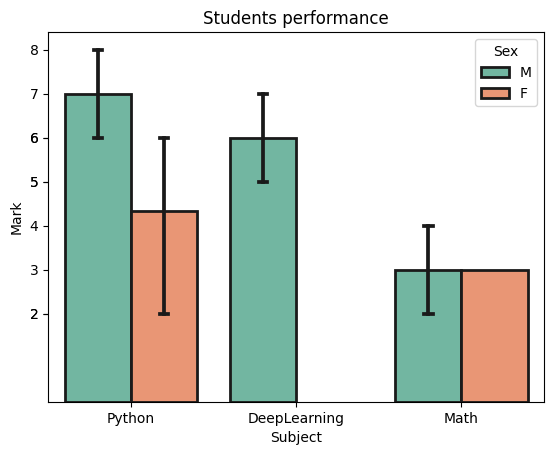

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(data = df_students_complete, x='Name_y', y='Mark',hue = 'Sex', capsize=.05,palette='Set2',errcolor=".1",
    linewidth=2, edgecolor=".1")
ax.set_yticks(df_students_complete.Mark)
ax.set_xlabel('Subject')
ax.set_title('Students performance')
plt.show()

Una interesante manera de estudiar la dispersión es mediante el *kernel density estimator (kde)*, que genera curvas de dispersión basadas en densidad de tipo probabilistico basado en un porcentaje. Se explica de la siguiente manera: si seleccionasemos un punto cualquier de nuestro dataset, la curva del kde 100% nos indicaría que tenemos un 100% de probabilidad de hallar dicho punto dentro del margen, en cambio, tenemos un 80% de probabilidad de hallar el punto dentro de la curva del kde 80%.


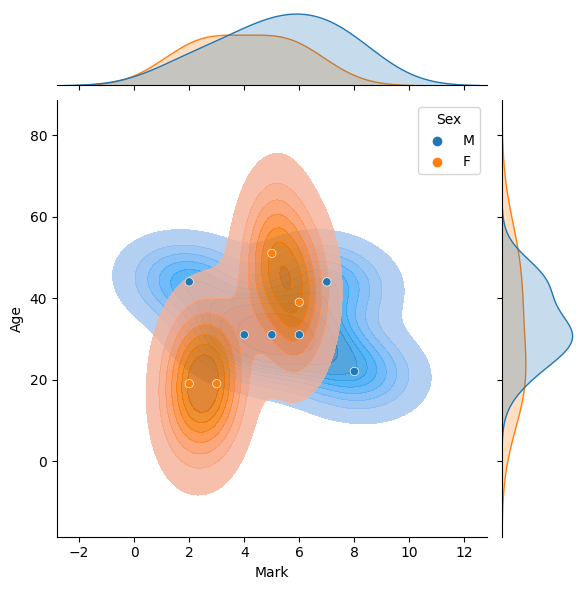

In [121]:
## representamos kde, junto con la dispersión de puntos.

sns.jointplot(
    data=df_students_complete,
    x="Mark", y="Age", hue="Sex",
    kind="kde", fill = True, alpha = 0.8)
sns.scatterplot(data=df_students_complete,
    x="Mark", y="Age", hue="Sex")
plt.show();

### A7 - 15%
- Dadas dos Series de Pandas, implementar una función 'find_not_common' para encontrar los elementos no comunes a ambas Series
- Se proveen dos series como referencia, el resultado para este ejemplo debe ser una serie con los elementos [4, 6, 14, 16]

In [122]:
p1 = pd.Series([2, 4, 12, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 10, 14, 2, 16, 10])

def find_not_common(a,b):
    '''
    Recibe dos series cualquiera como parámetros y realiza una union y una interseccion, despues comprueba que elementos de la unión no están en la intersección.
    Devuelve una serie de pandas.
    '''
    union = pd.Series(np.union1d(a,b))
    intersect = pd.Series(np.intersect1d(a,b))
    return pd.Series(union[~union.isin(intersect)].to_list()) ## to list para obligar al reindexado

print(find_not_common(p1,p2))
print(pd.Series([4, 6, 14, 16]))

print(find_not_common(p1, p2).equals(pd.Series([4, 6, 14, 16]))) # Esto deberia imprimir True

0     4
1     6
2    14
3    16
dtype: int64
0     4
1     6
2    14
3    16
dtype: int64
True
